<a href="https://colab.research.google.com/github/BobojonM/NeuralNetworks/blob/main/Seminar_2_2_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__*Attribute Information:*__
- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline

__*class:*__
- class_0
- class_1
- class_2

This is a copy of UCI ML Wine recognition datasets. https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

__*Original Owners:*__

Forina, M. et al, PARVUS - An Extendible Package for Data Exploration, Classification and Correlation. Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy.

__*Citation:*__

Lichman, M. (2013). UCI Machine Learning Repository [https://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

__*References*__

(1) S. Aeberhard, D. Coomans and O. de Vel, Comparison of Classifiers in High Dimensional Settings, Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of Mathematics and Statistics, James Cook University of North Queensland. (Also submitted to Technometrics).

The data was used with many others for comparing various classifiers. The classes are separable, though only RDA has achieved 100% correct classification. (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data)) (All results using the leave-one-out technique)

(2) S. Aeberhard, D. Coomans and O. de Vel, “THE CLASSIFICATION PERFORMANCE OF RDA” Tech. Rep. no. 92-01, (1992), Dept. of Computer Science and Dept. of Mathematics and Statistics, James Cook University of North Queensland. (Also submitted to Journal of Chemometrics).

In [76]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

# Step 0. Data preparation

In [77]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()
wine.data.shape

(178, 13)

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data[:, :2],
    wine.target,
    test_size=0.3,
    shuffle=True)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Step 1. Preparing a neural network model

## Step 1.1. Model architecture

In [79]:
class WineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(WineNet, self).__init__()
        self.fc1 = torch.nn.Linear(2, n_hidden_neurons)
        self.activ1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
        self.sm = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc3(x)
        return x

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x

wine_net = WineNet(5)

## Step 1.2. Loss function

In [80]:
loss = torch.nn.CrossEntropyLoss()


## Step 1.3. Optimizer

In [81]:
optimizer = torch.optim.Adam(wine_net.parameters(), lr=0.001)

# Step 2. Training loop

In [82]:
np.random.permutation(5)

array([2, 0, 1, 4, 3])

In [83]:
batch_size = 10

for epoch in range(5000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]

        preds = wine_net.forward(x_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()


    if epoch % 100 == 0:
        test_preds = wine_net.forward(X_test)
        test_preds = test_preds.argmax(dim=1)
        accuracy = (test_preds == y_test).float().mean()
        print(f"Epoch {epoch}, Accuracy: {accuracy}")

Epoch 0, Accuracy: 0.40740740299224854
Epoch 100, Accuracy: 0.40740740299224854
Epoch 200, Accuracy: 0.46296295523643494
Epoch 300, Accuracy: 0.5
Epoch 400, Accuracy: 0.42592594027519226
Epoch 500, Accuracy: 0.40740740299224854
Epoch 600, Accuracy: 0.5185185074806213
Epoch 700, Accuracy: 0.5185185074806213
Epoch 800, Accuracy: 0.4444444477558136
Epoch 900, Accuracy: 0.42592594027519226
Epoch 1000, Accuracy: 0.5
Epoch 1100, Accuracy: 0.5370370149612427
Epoch 1200, Accuracy: 0.5370370149612427
Epoch 1300, Accuracy: 0.5370370149612427
Epoch 1400, Accuracy: 0.7407407164573669
Epoch 1500, Accuracy: 0.6851851940155029
Epoch 1600, Accuracy: 0.6481481194496155
Epoch 1700, Accuracy: 0.6851851940155029
Epoch 1800, Accuracy: 0.6666666865348816
Epoch 1900, Accuracy: 0.6851851940155029
Epoch 2000, Accuracy: 0.6851851940155029
Epoch 2100, Accuracy: 0.6851851940155029
Epoch 2200, Accuracy: 0.7222222089767456
Epoch 2300, Accuracy: 0.7037037014961243
Epoch 2400, Accuracy: 0.7407407164573669
Epoch 2500,

# Step 3. Visualization of dividing surfaces.

<ipython-input-84-4ffbf2cfa672>:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[indexes, 0],


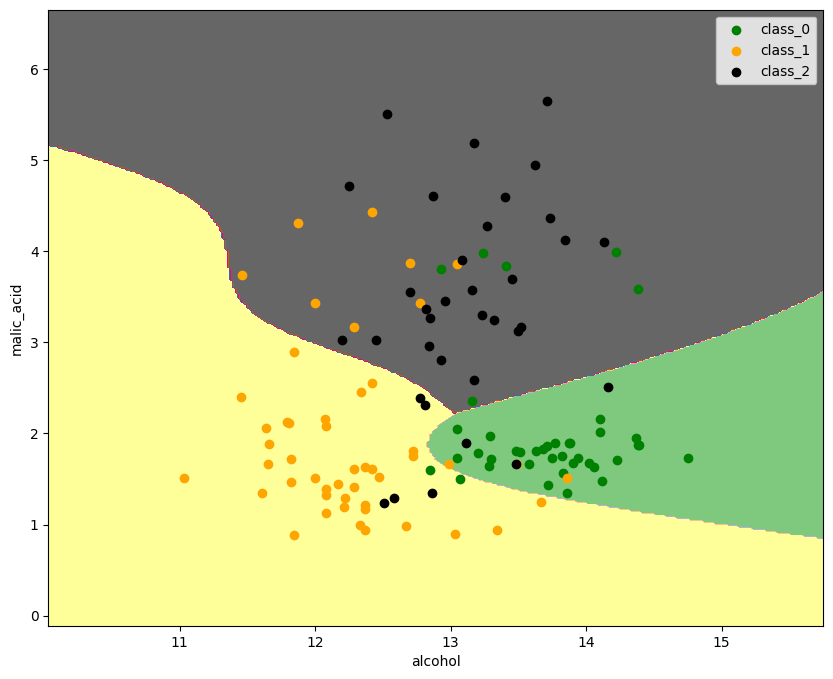

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 8)

n_classes = 3
plot_colors = ['g', 'orange', 'black']
plot_step = 0.02

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy =  torch.meshgrid(torch.arange(x_min, x_max, plot_step),
                         torch.arange(y_min, y_max, plot_step))

preds = wine_net.inference(
    torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1))

preds_class = preds.data.numpy().argmax(axis=1)
preds_class = preds_class.reshape(xx.shape)
plt.contourf(xx, yy, preds_class, cmap='Accent')

for i, color in zip(range(n_classes), plot_colors):
    indexes = np.where(y_train == i)
    plt.scatter(X_train[indexes, 0],
                X_train[indexes, 1],
                c=color,
                label=wine.target_names[i],
                cmap='Accent')
    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])
    plt.legend()

# Step 4. Homework (60 points)

Let's practice with WineNet. Modify the architecture so that all 13 features are accepted as input and perform the following experiments:

1. Experiment with the number of neurons in the hidden layers. Try putting a very small number. Is there a threshold value for the number of hidden neurons at which learning becomes impossible?

2. Try passing different test_size values to the train_test_split function. At what value of test_size does the network predict worse than Base Rate*? And what is the Base Rate of the wine dataset?

3. Does the training time per epoch depend on the batch size? Explore this relationship.

As a report attach code and graphs that show all the necessary dependencies.

##Load data

## 1. Model Architecture:

In [119]:
class WineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(WineNet, self).__init__()
        self.fc1 = torch.nn.Linear(13, n_hidden_neurons)
        self.activ1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
        self.sm = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc3(x)
        return x

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x


Base Rate: 0.41935483870967744


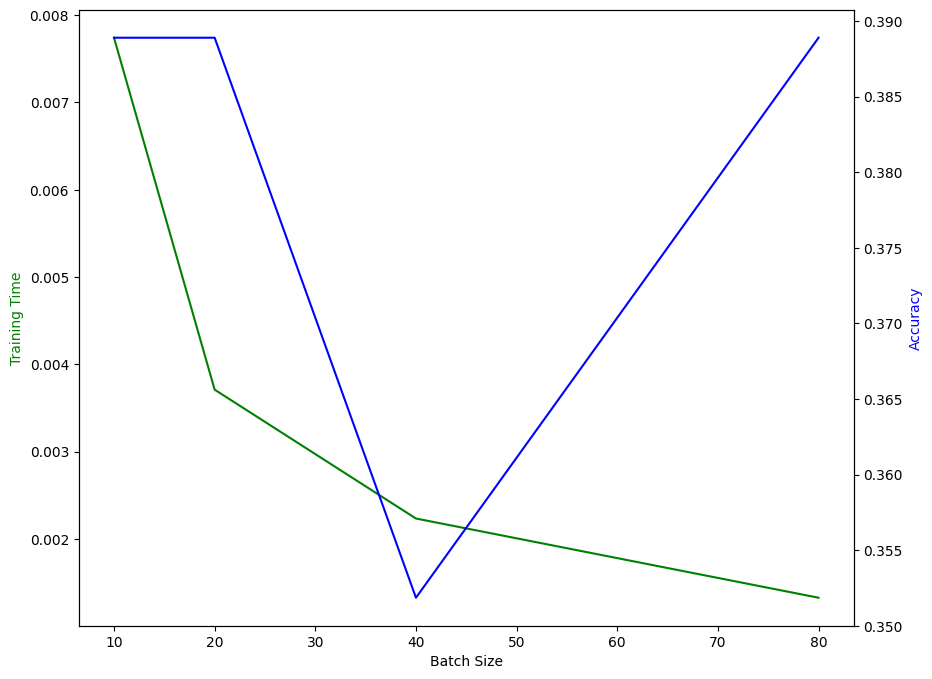

In [153]:
import time

X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, test_size=0.3, shuffle=True)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Calculate Base Rate
unique_classes, counts = np.unique(y_train, return_counts=True)
most_common_class_count = max(counts)
base_rate = most_common_class_count / len(y_train)
print(f"Base Rate: {base_rate}")

n_epochs = 100

# Record times and accuracies
batch_times = {}
accuracies = {}

# Experiment with batch sizes
for batch in [10, 20, 40, 80]:
    wine_net = WineNet(5)
    start_time = time.time()
    for epoch in range(n_epochs):
        order = np.random.permutation(len(X_train))
        for start_index in range(0, len(X_train), batch):
            optimizer.zero_grad()
            batch_indexes = order[start_index:start_index+batch]
            x_batch = X_train[batch_indexes]
            y_batch = y_train[batch_indexes]

            preds = wine_net.forward(x_batch)
            loss_value = loss(preds, y_batch)
            loss_value.backward()

            optimizer.step()

    end_time = time.time()

    # Record the average time
    batch_times[batch] = (end_time - start_time) / n_epochs

    test_preds = wine_net.forward(X_test)
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().item()
    accuracies[batch] = accuracy

# Visualization
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(list(batch_times.keys()), list(batch_times.values()), 'g-')
ax2.plot(list(accuracies.keys()), list(accuracies.values()), 'b-')

ax1.set_xlabel('Batch Size')
ax1.set_ylabel('Training Time', color='g')
ax2.set_ylabel('Accuracy', color='b')

plt.show()
